Устанавливает пакеты

In [3]:
!pip install fdd-defense.zip

Processing c:\users\akil\pycharmprojects\neironka\fdd-defense.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/airi-industrial-ai/fddbenchmark to c:\users\akil\appdata\local\temp\pip-install-vxvuntvb\fddbenchmark_5fa3f0e4cc424e149d8fdc4ad474219e
  Resolved https://github.com/airi-industrial-ai/fddbenchmark to commit c0a08db36bc6e7759afb4b934a359afbe550ae72
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 323.6/323.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
  Created wheel for fdd-defense: filename=fdd_defense-0.0.1-py3-none-any.whl size=11927 sha256=0b489dc8e82e11b788c20a71c520e80742a22dc1df6b23cd260114302e730e12
  Stored in directory: c:\users\akil\appdata\local\pip\cache\wheels\88\d1\c3\4fdc5e201d08fedf72e072094842a7acba6fd88f0068923485
  Created wh

  Running command git clone --filter=blob:none --quiet https://github.com/airi-industrial-ai/fddbenchmark 'C:\Users\akil\AppData\Local\Temp\pip-install-vxvuntvb\fddbenchmark_5fa3f0e4cc424e149d8fdc4ad474219e'

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install git+https://github.com/airi-industrial-ai/fddbenchmark

  Cloning https://github.com/airi-industrial-ai/fddbenchmark to c:\users\akil\appdata\local\temp\pip-req-build-m1w28q_8
  Resolved https://github.com/airi-industrial-ai/fddbenchmark to commit c0a08db36bc6e7759afb4b934a359afbe550ae72
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/airi-industrial-ai/fddbenchmark 'C:\Users\akil\AppData\Local\Temp\pip-req-build-m1w28q_8'

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from fddbenchmark import FDDDataset, FDDDataloader, FDDEvaluator
from fdd_defense.attacks import FGSMAttack, PGDAttack, DeepfoolLinfAttack
from fdd_defense.models.base import BaseTorchModel
from fdd_defense.models import GRU
import torch. nn as nn
from torch.optim import Adam
import torch
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Загружаем маленький теп

In [5]:
dataset = FDDDataset(name='small_tep')
dataset.df.head()

Reading data/small_tep/test_mask.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153300/153300 [00:00<00:00, 3938494.54it/s]


xmeas_1  xmeas_2  xmeas_3  xmeas_4  xmeas_5  xmeas_6  \
run_id    sample                                                         
413402073 1       0.25038   3674.0   4529.0   9.2320   26.889   42.402   
          2       0.25109   3659.4   4556.6   9.4264   26.721   42.576   
          3       0.25038   3660.3   4477.8   9.4426   26.875   42.070   
          4       0.24977   3661.3   4512.1   9.4776   26.758   42.063   
          5       0.29405   3679.0   4497.0   9.3381   26.889   42.650   

                  xmeas_7  xmeas_8  xmeas_9  xmeas_10  ...   xmv_2   xmv_3  \
run_id    sample                                       ...                   
413402073 1        2704.3   74.863   120.41   0.33818  ...  53.744  24.657   
          2        2705.0   75.000   120.41   0.33620  ...  53.414  24.588   
          3        2706.2   74.771   120.42   0.33563  ...  54.357  24.666   
          4        2707.2   75.224   120.39   0.33553  ...  53.946  24.725   
          5        2705.1   75.388   120.39   0.32632  ...  53.658  28.797   

                   xmv_4   xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  \
run_id    sample                                                           
413402073 1       62.544  22.137  39.935  42.323  47.757  47.510  41.258   
          2       59.259  22.084  40.176  38.554  43.692  47.427  41.359   
          3       61.275  22.380  40.244  38.990  46.699  47.468  41.199   
          4       59.856  22.277  40.257  38.072  47.541  47.658  41.643   
          5       60.717  21.947  39.144  41.955  47.645  47.346  41.507   

                  xmv_11  
run_id    sample          
413402073 1       18.447  
          2       17.194  
          3       20.530  
          4       18.089  
          5       18.461  

[5 rows x 52 columns]

In [6]:
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

In [11]:
import wandb


In [ ]:
def train():
   with wandb.init() as run:
       config = wandb.config
       model = GRU(**config)
       for epoch in range(config["num_epochs"]):
           loss = model.fit(dataset)  # your model training code here
           wandb.log({"loss": loss, "epoch": epoch})

sweep_config = {
 "name" : "my-sweep",
 "method" : "bayes",
 "metric" : {'goal': "minimize",
            'name': 'loss'},
   
 "parameters" : {
     "step_size" :{
     "value": 1,
   },
   "hidden_dim" :{
     "min": 100,
     "max": 350
   },
   "num_epochs" : {
     "min":10,
       "max":30
   },
   "batch_size" :{
     "min": 350,
     "max": 400
   },
   "lr" :{
     "min": 0.001,
     "max": 0.005
   },
   "window_size" :{
     "value": 10
   },
   "dropout" :{
     "min": 0.01,
     "max": 0.4
   }
     
     
     
   
 }
}

sweep_id = wandb.sweep(sweep_config)
count = 2 # number of runs to execute
wandb.agent(sweep_id, function=train, count=count)

Create sweep with ID: mkdjp0wy
Sweep URL: https://wandb.ai/gardrazi/uncategorized/sweeps/mkdjp0wy


wandb: Agent Starting Run: hjydh5as with config:
wandb: 	batch_size: 396
wandb: 	dropout: 0.07300764286078813
wandb: 	hidden_dim: 166
wandb: 	lr: 0.0021306963179602715
wandb: 	num_epochs: 28
wandb: 	step_size: 1
wandb: 	window_size: 10
wandb: Currently logged in as: kesha1997g (gardrazi). Use `wandb login --relogin` to force relogin


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3399.05it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0895


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5211


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4256


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3942


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3554


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3387


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3260


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3200


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3148


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2903


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2916


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2759


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2744


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2477


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2537


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2382


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2315


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2278


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2129


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2275


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2359


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2029


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2032


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1922


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2193


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1885


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1777


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1738


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2339.64it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0516


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5193


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4257


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3803


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3434


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3296


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3100


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.2916


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2791


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2856


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2742


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2493


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2428


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2507


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2397


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2288


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2287


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2244


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2101


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2008


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2254


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1993


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1921


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2013


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1814


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1915


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1952


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1866


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2064.35it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0715


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5099


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4390


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3939


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3522


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3339


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3137


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3132


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3012


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3029


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2750


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2695


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2645


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2533


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2443


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2516


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2286


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2331


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2158


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2127


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2095


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2008


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2020


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1915


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1800


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2038


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1741


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1870


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2239.81it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0637


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5268


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4296


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3852


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3470


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3301


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3174


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.2993


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2942


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2876


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2720


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2665


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2569


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2442


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2492


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2316


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2352


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2357


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2244


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2307


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2277


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2131


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1930


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1971


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1949


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1806


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1873


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1816


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.40it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0871


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5231


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4300


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3919


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3537


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3356


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3165


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3015


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2903


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2737


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2663


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2723


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2536


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2454


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2434


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2258


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2493


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2211


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2276


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2203


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2194


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1961


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1974


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1897


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1967


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1818


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1909


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1789


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.62it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0485


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5199


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4346


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3839


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3608


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3398


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3322


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3146


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3052


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2891


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2883


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2651


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2701


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2514


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2547


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2262


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2294


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2277


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2290


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2066


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2092


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2102


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2008


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2012


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1960


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1877


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1805


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1812


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2288.72it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0806


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5280


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4410


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3914


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3671


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3494


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3251


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3219


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3031


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3053


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.3037


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2813


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2636


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2679


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2808


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2452


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2406


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2330


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2261


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2339


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2088


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1979


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2088


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2011


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1894


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1907


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1837


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1672


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2024.64it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1102


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5258


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4313


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3894


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3507


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3361


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3158


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.2999


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3008


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2776


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2707


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2554


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2450


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2480


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2444


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2320


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2338


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2248


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2216


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2191


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.1860


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2033


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1899


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1931


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1885


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1876


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1964


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1801


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2193.24it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1145


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5248


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4264


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3846


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3572


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3390


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3214


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3072


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2974


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2985


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2774


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2713


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2685


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2549


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2418


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2370


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2325


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2421


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2189


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2115


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2033


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2081


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2111


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1945


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2020


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1987


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1986


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1780


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.56it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0546


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5179


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4274


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3872


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3499


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3253


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3106


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3138


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2837


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2908


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2688


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2546


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2566


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2532


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2409


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2406


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2246


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2136


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2154


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.1996


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2069


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2084


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1993


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2046


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1762


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1814


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1742


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1763


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.41it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1008


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5198


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4331


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4034


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3511


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3478


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3382


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3056


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3013


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2958


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2870


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2792


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2682


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2564


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2444


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2455


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2305


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2293


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2208


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2323


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2116


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2066


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2036


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1935


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1896


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1994


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1884


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1766


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1986.47it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0737


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5291


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4249


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3869


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3605


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3431


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3248


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3218


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3057


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2937


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2712


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2636


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2668


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2624


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2506


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2313


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2230


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2318


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2075


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2195


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2092


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1917


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2133


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1949


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1976


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1915


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1953


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1839


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.63it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0840


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5235


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4307


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3780


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3715


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3352


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3370


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3062


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2900


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2857


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2921


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2629


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2488


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2622


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2356


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2537


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2286


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2285


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2393


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2277


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2080


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2095


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2112


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1936


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1966


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.2039


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1887


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1716


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2064.25it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0853


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5345


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4400


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3961


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3611


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3563


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3285


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3108


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3084


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3079


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2901


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2885


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2779


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2657


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2686


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2534


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2469


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2331


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2370


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2220


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2153


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2435


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2126


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2017


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1816


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1956


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1862


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1903


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2148.55it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0727


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5062


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4223


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4024


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3607


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3432


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3295


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3133


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3120


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2988


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2994


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2909


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2758


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2607


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2547


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2446


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2492


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2421


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2309


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2158


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2273


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2080


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1917


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1999


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2222


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1913


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1964


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.2042


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2148.56it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0722


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5124


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4398


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3805


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3406


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3199


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3387


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.2921


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2929


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2876


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2883


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2524


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2751


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2462


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2495


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2372


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2225


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2271


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2339


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.1989


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2157


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2062


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1909


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1901


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1814


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1922


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1836


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1864


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2105.61it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0714


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5236


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4315


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3829


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3645


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3364


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3258


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3122


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2974


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.3018


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2766


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2773


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2522


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2399


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2423


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2337


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2178


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2079


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2292


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2134


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2089


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1900


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2192


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2019


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1884


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1724


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1869


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1704


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2288.73it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0498


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5106


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4154


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3812


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3544


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3399


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3112


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.2980


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2910


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2748


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2743


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2737


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2551


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2554


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2471


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2369


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2336


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2375


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2164


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2099


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2139


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2004


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1870


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1908


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1969


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1883


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1857


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1847


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2339.59it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0670


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5179


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4362


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4051


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3572


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3404


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3273


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3391


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3162


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2937


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2852


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2766


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2646


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2480


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2831


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2612


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2411


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2339


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2398


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2235


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2140


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2003


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1978


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2360


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1935


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1929


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1900


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1833


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2239.92it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0879


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5318


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4554


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3963


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3714


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3363


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3480


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3345


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3081


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2972


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2972


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2800


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2856


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2725


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2652


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2661


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2396


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2303


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2409


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2296


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2145


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2352


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2098


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2028


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.2045


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1909


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1860


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1745


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2288.74it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0915


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5342


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4376


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4037


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3732


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3457


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3253


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3227


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3024


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2954


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2959


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2785


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2780


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2564


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2498


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2501


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2299


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2313


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2246


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2214


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2072


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2086


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2026


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2109


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1949


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1945


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1842


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1897


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2363.56it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0604


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5032


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4211


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3720


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3538


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3377


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3177


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3105


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.2808


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2790


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2758


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2596


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2455


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2466


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2502


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2290


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2211


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2191


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2114


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2081


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2050


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1899


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2009


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2032


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1941


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1689


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1940


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1888


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2148.53it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0873


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5196


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4312


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3985


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3549


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3431


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3483


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3129


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3155


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2990


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2844


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2871


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2759


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2665


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2665


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2527


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2388


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2405


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2355


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2265


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2192


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.2190


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1904


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.2093


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1881


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1891


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1879


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1827


Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2193.28it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.1162


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5392


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4328


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.3909


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3645


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3419


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3375


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Обучаем целевую модель

In [12]:
window_size = 10

fddmodel = GRU(
        window_size=window_size,
        step_size=1,
        hidden_dim=166,
        num_epochs=28,
        batch_size=396,
        lr=0.002131,
        dropout=0.07301
    )
fddmodel.fit(dataset)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3187.69it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 1, Loss: 1.0556


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 2, Loss: 0.5177


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4155


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4056


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 5, Loss: 0.3590


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 6, Loss: 0.3321


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 7, Loss: 0.3183


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 8, Loss: 0.3202


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 9, Loss: 0.3067


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 10, Loss: 0.2912


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 11, Loss: 0.2912


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 12, Loss: 0.2802


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 13, Loss: 0.2960


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 14, Loss: 0.2614


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 15, Loss: 0.2434


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 16, Loss: 0.2404


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 17, Loss: 0.2335


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 18, Loss: 0.2312


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 19, Loss: 0.2184


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 20, Loss: 0.2145


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 21, Loss: 0.2176


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1968


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 23, Loss: 0.2005


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1896


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1943


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1933


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1859


Steps ...:   0%|          | 0/130 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1927


0.19271445388977343

Замеряем метрики на тестовой выборке

In [13]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3190.35it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9952/0.0000
    Fault 02: 0.9840/0.0000
    Fault 03: 0.3785/0.0529
    Fault 04: 0.9890/0.0000
    Fault 05: 0.9887/0.0000
    Fault 06: 0.9409/0.0000
    Fault 07: 0.9995/0.0000
    Fault 08: 0.8563/0.0004
    Fault 09: 0.3494/0.0945
    Fault 10: 0.8223/0.0101
    Fault 11: 0.9650/0.0037
    Fault 12: 0.6861/0.0003
    Fault 13: 0.8881/0.0001
    Fault 14: 0.9962/0.0000
    Fault 15: 0.0851/0.0362
    Fault 16: 0.8576/0.0019
    Fault 17: 0.9487/0.0000
    Fault 18: 0.7630/0.0001
    Fault 19: 0.9672/0.0343
    Fault 20: 0.9119/0.0164
Detection TPR: 0.9161
Detection FPR: 0.2508
Average Detection Delay (ADD): 5.59
Total Correct Diagnosis Rate (Total CDR): 0.8936

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.6065
Normalized Mutual Information (NMI): 0.7817
Unsupervised Clustering Accuracy (ACC): 0.8048


Проводим то самое на среднем датасете


In [11]:
dataset = FDDDataset(name='reinartz_tep')
dataset.df.head()

KeyboardInterrupt: 

In [7]:
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

In [8]:
window_size = 10

fddmodel = GRU(
        window_size=window_size,
        step_size=1,
        hidden_dim=166,
        num_epochs=28,
        batch_size=396,
        lr=0.002131,
        dropout=0.07301
    )
fddmodel.fit(dataset)

Creating sequence of samples: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:12<00:00, 178.18it/s]


Epochs ...:   0%|          | 0/28 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 1, Loss: 0.1622


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 2, Loss: 0.1225


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 3, Loss: 0.1163


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 4, Loss: 0.1133


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 5, Loss: 0.1111


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 6, Loss: 0.1095


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 7, Loss: 0.1082


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 8, Loss: 0.1071


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 9, Loss: 0.1063


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 10, Loss: 0.1058


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 11, Loss: 0.1055


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 12, Loss: 0.1051


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 13, Loss: 0.1047


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 14, Loss: 0.1041


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 15, Loss: 0.1046


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 16, Loss: 0.1052


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 17, Loss: 0.1054


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 18, Loss: 0.1044


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 19, Loss: 0.1044


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 20, Loss: 0.1045


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 21, Loss: 0.1044


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 22, Loss: 0.1047


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 23, Loss: 0.1050


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 24, Loss: 0.1053


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 25, Loss: 0.1053


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 26, Loss: 0.1059


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 27, Loss: 0.1058


Steps ...:   0%|          | 0/11257 [00:00<?, ?it/s]

Epoch 28, Loss: 0.1068


0.10681935839611133

In [9]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 560/560 [00:02<00:00, 222.20it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9970/0.0000
    Fault 02: 0.9950/0.0000
    Fault 03: 0.9517/0.0002
    Fault 04: 0.9981/0.0000
    Fault 05: 0.2780/0.0012
    Fault 06: 0.9993/0.0000
    Fault 07: 0.9986/0.0000
    Fault 08: 0.9792/0.0000
    Fault 09: 0.2990/0.0003
    Fault 10: 0.9798/0.0000
    Fault 11: 0.9519/0.0000
    Fault 12: 0.8977/0.0000
    Fault 13: 0.9666/0.0000
    Fault 14: 0.9966/0.0000
    Fault 15: 0.0064/0.0003
    Fault 16: 0.3370/0.0008
    Fault 17: 0.9806/0.0000
    Fault 18: 0.9641/0.0000
    Fault 19: 0.9929/0.0000
    Fault 20: 0.9734/0.0000
    Fault 21: 0.0000/0.0000
    Fault 22: 0.4921/0.0002
    Fault 23: 0.9529/0.0000
    Fault 24: 0.9899/0.0000
    Fault 25: 0.9887/0.0000
    Fault 26: 0.9743/0.0000
    Fault 27: 0.9846/0.0000
    Fault 28: 0.4913/0.0020
Detection TPR: 0.8371
Detection FPR: 0.0051
Average Detection Delay (ADD): 28.61
Total Correct Diagnosis Rate (Total CDR): 0.9564

Clustering metrics
-----------------
Adjusted 

In [21]:
attack = FGSMAttack(model=fddmodel, eps=0.057)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

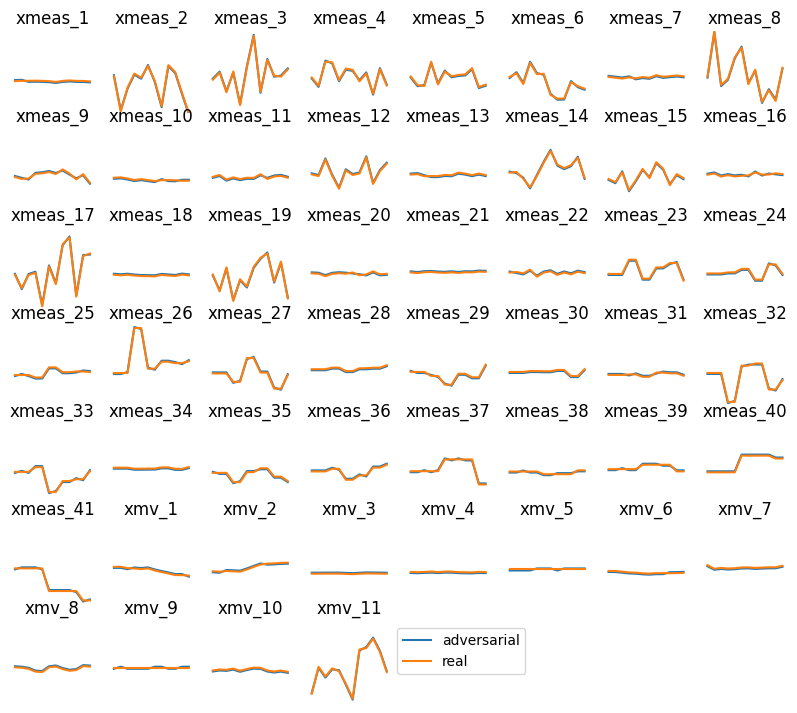

In [22]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Замеряем метрики на атакованных данных

In [23]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9812/0.0000
    Fault 02: 0.9879/0.0008
    Fault 03: 0.0000/0.0001
    Fault 04: 0.9848/0.0000
    Fault 05: 0.0044/0.0011
    Fault 06: 0.9975/0.0000
    Fault 07: 0.9986/0.0000
    Fault 08: 0.9720/0.0070
    Fault 09: 0.0097/0.0394
    Fault 10: 0.9620/0.0629
    Fault 11: 0.8396/0.0008
    Fault 12: 0.6679/0.0437
    Fault 13: 0.9669/0.0042
    Fault 14: 0.9706/0.0008
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0010/0.0073
    Fault 17: 0.9774/0.0001
    Fault 18: 0.9234/0.0007
    Fault 19: 0.9822/0.0001
    Fault 20: 0.9705/0.0002
    Fault 21: 0.0000/0.0000
    Fault 22: 0.3422/0.4738
    Fault 23: 0.3747/0.3109
    Fault 24: 0.9739/0.0006
    Fault 25: 0.9391/0.0000
    Fault 26: 0.5146/0.0447
    Fault 27: 0.0267/0.0001
    Fault 28: 0.0003/0.0003
Detection TPR: 0.9991
Detection FPR: 0.9997
Average Detection Delay (ADD): 0.00
Total Correct Diagnosis Rate (Total CDR): 0.6209

Clustering metrics
-----------------
Adjusted R

FP-99.9% модель не рабочая

In [14]:
attack = PGDAttack(model=fddmodel, eps=0.06)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

In [15]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9877/0.0002
    Fault 02: 0.9810/0.0000
    Fault 03: 0.0008/0.1482
    Fault 04: 0.9630/0.0156
    Fault 05: 0.9782/0.0001
    Fault 06: 0.9334/0.0000
    Fault 07: 0.9985/0.0000
    Fault 08: 0.7942/0.0057
    Fault 09: 0.0183/0.5199
    Fault 10: 0.6488/0.0274
    Fault 11: 0.9312/0.0511
    Fault 12: 0.6581/0.0006
    Fault 13: 0.8523/0.0010
    Fault 14: 0.9947/0.0001
    Fault 15: 0.0033/0.0827
    Fault 16: 0.6343/0.0140
    Fault 17: 0.9467/0.0000
    Fault 18: 0.7569/0.0002
    Fault 19: 0.9021/0.0595
    Fault 20: 0.7750/0.0378
Detection TPR: 0.9054
Detection FPR: 0.9639
Average Detection Delay (ADD): 4.29
Total Correct Diagnosis Rate (Total CDR): 0.8150

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.5086
Normalized Mutual Information (NMI): 0.7084
Unsupervised Clustering Accuracy (ACC): 0.7227


FP 96% -модель больше не рабоатет

DeepfoolAttack на маленьком датасете

In [17]:
attack = DeepfoolLinfAttack(model=fddmodel, eps=0.05,num_steps=10)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

In [18]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.6531/0.0291
    Fault 02: 0.0235/0.0000
    Fault 03: 0.0000/0.0000
    Fault 04: 0.0160/0.0000
    Fault 05: 0.6280/0.0001
    Fault 06: 0.0013/0.0172
    Fault 07: 0.7610/0.0639
    Fault 08: 0.2548/0.0396
    Fault 09: 0.0516/0.0702
    Fault 10: 0.1322/0.0004
    Fault 11: 0.6683/0.4829
    Fault 12: 0.0090/0.0000
    Fault 13: 0.6025/0.0168
    Fault 14: 0.2243/0.0123
    Fault 15: 0.0000/0.0000
    Fault 16: 0.1021/0.0015
    Fault 17: 0.0000/0.0000
    Fault 18: 0.0040/0.0013
    Fault 19: 0.4453/0.2540
    Fault 20: 0.2523/0.0107
Detection TPR: 0.9992
Detection FPR: 1.0000
Average Detection Delay (ADD): 0.00
Total Correct Diagnosis Rate (Total CDR): 0.2417

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.1468
Normalized Mutual Information (NMI): 0.3222
Unsupervised Clustering Accuracy (ACC): 0.3262
